El conjunto de datos `Wine recognition dataset` es un conjunto de datos disponible en la biblioteca de scikit-learn que se utiliza comúnmente para ejemplos y prácticas de machine learning. Este conjunto de datos es una clasificación multi-clase que consiste en muestras de tres clases diferentes de vinos. El conjunto de datos consta de 13 características químicas medidas para diferentes muestras de vinos.

El objetivo es predecir la clase a la que pertenece cada vino en función de estas características químicas.

Las tres clases representan tres cultivares diferentes de vinos, a saber:

- Clase 0: Cultivar 1
- Clase 1: Cultivar 2
- Clase 2: Cultivar 3

In [61]:
from sklearn.datasets import load_wine
import pandas as pd

# Cargar el conjunto de datos de reconocimiento de vinos
wine = load_wine()
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df['target'] = wine.target

# Reorganizar las columnas del DataFrame
cols = list(wine_df.columns)
cols = ['target'] + [col for col in cols if col != 'target']
wine_df = wine_df[cols]

wine_df.head(3)

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,0,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,0,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0


Text(0.5, 1.0, 'Wine classes count')

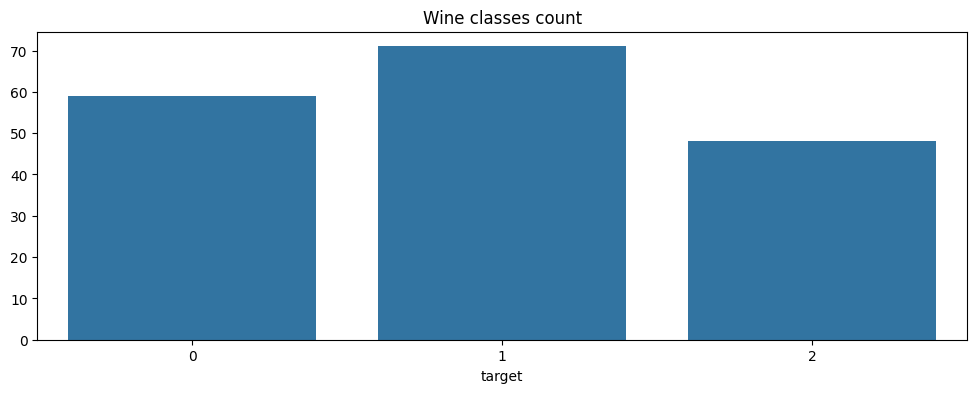

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

wine_class_count = wine_df['target'].value_counts()
plt.figure(figsize=(12,4))
sns.barplot(x=wine_class_count.index, y=wine_class_count.values)
plt.title("Wine classes count")

## Utilizando Random Forest Classifier

In [62]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=3, random_state=42)

rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

# Evaluar el rendimiento del clasificador
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy Score: 0.9444444444444444

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      0.93      0.93        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



array([[13,  1,  0],
       [ 0, 13,  1],
       [ 0,  0,  8]], dtype=int64)

In [63]:
from sklearn.model_selection import cross_val_score

# Realizar validación cruzada en el modelo
cv_scores = cross_val_score(rf_classifier, wine.data, wine.target, cv=4)

# Imprimir los puntajes de validación cruzada
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Cross-Validation Scores: [0.8        0.91111111 0.95454545 0.97727273]
Mean CV Score: 0.9107323232323232


In [68]:
alcohol = 14.13
malic_acid = 1.10
ash	= 2.74
alcalinity_of_ash = 24.5
magnesium = 96.0
total_phenols = 2.05
flavanoids = 0.76
nonflavanoid_phenols = 0.56
proanthocyanins = 1.35
color_intensity = 9.2
hue = 0.61
od280_od315_of_diluted_wines = 1.60	
proline = 560.0

nueva_instancia = [[alcohol, malic_acid, ash, alcalinity_of_ash, magnesium, total_phenols,
                    flavanoids, nonflavanoid_phenols, proanthocyanins, color_intensity, 
                    hue, od280_od315_of_diluted_wines, proline]]

prediccion = rf_classifier.predict(nueva_instancia)
print("Predicción: Clase", prediccion)


Predicción: Clase [2]
